# Exercícios 2.2 e 2.3

In [ ]:
# Instalar as dependências
# !pip install vaderSentiment textblob spacytextblob spacy text2emotion tqdm afinn flair pattern
# Nota: Reiniciar o Kernel após este código

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 9.4 MB/s eta 0:00:0

## Dados

In [ ]:
# Datasets de treino e teste (imdb reviews):
file_path_train = "imdb_reviews_train.csv"
file_path_test = "imdb_reviews_test.csv"
df_imdb_train = pd.read_csv(file_path_train)
df_imdb_test = pd.read_csv(file_path_test)
df_imdb_test.head()

text label
0  Logan Lerman & Dean Collins III of Jack & Bobb...   pos
1  I have seen this film on a Sunday evening and ...   pos
2  Two great stars and a legendary Director creat...   pos
3  I'm originally from Brazil... the sad thing ab...   pos
4  "Witchery" is a decent little Euro Trash horro...   pos

## 2.2 Definição de um baseline usando ferramentas já existentes

Para este exercício, decidimos utilizar as seguintes **baselines** para a análise de sentimento:

- **TextBlob**: Um modelo simples, que provavelmente não dará os melhores resultados devido à sua simplicidade, mas que foi abordado nas aulas e serve como uma boa referência inicial.
- **Vader Sentiment**: Uma ferramenta bastante usada para análise de sentimentos em textos curtos. É uma abordagem robusta para a deteção de polaridade.
- **Afinn**: Outro modelo simples e eficiente, focado na análise de palavras e suas polaridades.
- **Pattern**: Partilha a mesma base léxica que o TextBlob, uma vez que o TextBlob utiliza internamente o módulo de análise de sentimentos do Pattern.
- **Flair**: Um modelo mais avançado para análise de texto, que tem mostrado bons resultados em datasets como o iMDb.
- **spaCy**: Embora use internamente o TextBlob, cujos resultados são semelhantes, é um bom *baseline* a incluir.

Opcionais:
- **Text2Emotion**: Não é considerado uma baseline (a documentação refere que necessita de pré-processamento), mas decidimos usá-lo, devido ao seu potencial para identificar emoções nos textos.



In [ ]:
from transformers import pipeline
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt_tab')

# Barra para ver o progresso do run time
tqdm.pandas()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Função universal para avaliar os modelos
def avaliar_modelo(y_true, y_pred, nome_modelo):
    print(f"\nResultados para: {nome_modelo}")

    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {round(accuracy, 3)}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4, target_names = ['Negativo', 'Positivo']))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize = (5, 4))
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
                xticklabels = ['Negativo', 'Positivo'], yticklabels = ['Negativo', 'Positivo'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.show()

In [ ]:
# Labels reais em binário, que irão servir para o cálculo das métricas
df_imdb_test['label_bin'] = df_imdb_test['label'].map({'neg': 0, 'pos': 1})
y_true = df_imdb_test['label_bin']

### TextBlob approach

100%|██████████| 21996/21996 [00:38<00:00, 564.89it/s]



Resultados para: TextBlob
Accuracy: 0.702

Classification Report:
              precision    recall  f1-score   support

    Negativo     0.9013    0.4564    0.6059     11050
    Positivo     0.6337    0.9496    0.7602     10946

    accuracy                         0.7018     21996
   macro avg     0.7675    0.7030    0.6831     21996
weighted avg     0.7682    0.7018    0.6827     21996



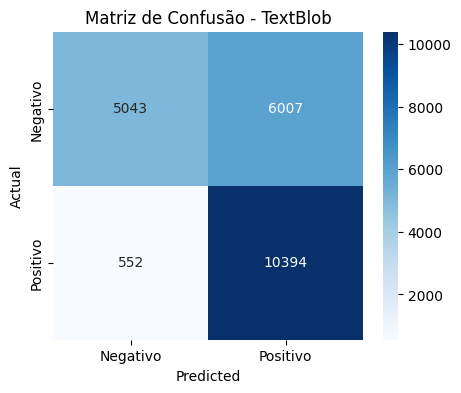

In [ ]:
from textblob import TextBlob

# TextBlob
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

df_imdb_test['textblob_score'] = df_imdb_test['text'].progress_apply(get_textblob_sentiment)
df_imdb_test['textblob_pred'] = df_imdb_test['textblob_score'].apply(lambda x: 1 if x > 0 else 0)
y_pred = df_imdb_test['textblob_pred']
avaliar_modelo(y_true, y_pred, nome_modelo = "TextBlob")

### Pattern approach

O Pattern e o TextBlob partilham a mesma base léxica, uma vez que o TextBlob utiliza internamente o módulo de análise de sentimentos do Pattern. Por esse motivo, os resultados obtidos por ambas as ferramentas são idênticos.

100%|██████████| 21996/21996 [00:29<00:00, 741.68it/s]



Resultados para: Pattern (via TextBlob)
Accuracy: 0.702

Classification Report:
              precision    recall  f1-score   support

    Negativo     0.9013    0.4564    0.6059     11050
    Positivo     0.6337    0.9496    0.7602     10946

    accuracy                         0.7018     21996
   macro avg     0.7675    0.7030    0.6831     21996
weighted avg     0.7682    0.7018    0.6827     21996



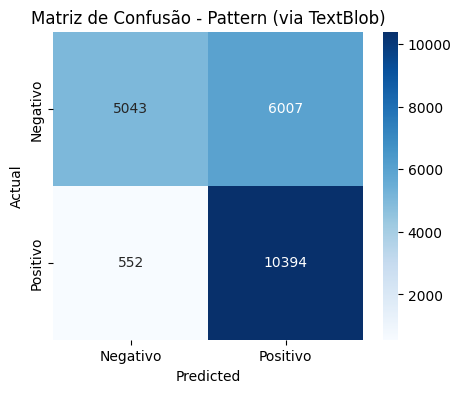

In [ ]:
def get_pattern_sentiment(text):
    return TextBlob(text).sentiment.polarity  # usa lexicon do Pattern

df_imdb_test['pattern_score'] = df_imdb_test['text'].progress_apply(get_pattern_sentiment)
df_imdb_test['pattern_pred'] = df_imdb_test['pattern_score'].apply(lambda x: 1 if x > 0 else 0)

y_pred = df_imdb_test['pattern_pred']
avaliar_modelo(y_true, y_pred, nome_modelo  ="Pattern")

### Spacy approach


Resultados para: SpaCy
Accuracy: 0.702

Classification Report:
              precision    recall  f1-score   support

    Negativo     0.9013    0.4564    0.6059     11050
    Positivo     0.6337    0.9496    0.7602     10946

    accuracy                         0.7018     21996
   macro avg     0.7675    0.7030    0.6831     21996
weighted avg     0.7682    0.7018    0.6827     21996



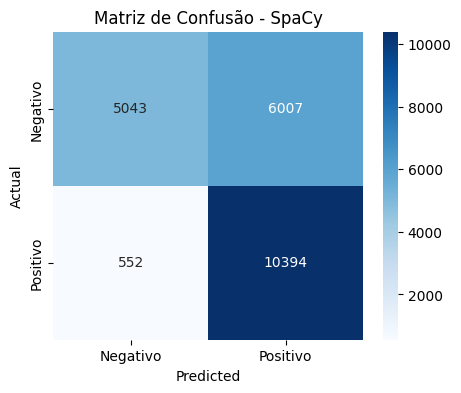

In [ ]:
import spacy
from spacy.tokens import Doc
from spacytextblob.spacytextblob import SpacyTextBlob
from tqdm import tqdm

Doc.set_extension('polarity', default = None, force = True)

# Load spaCy pipeline and add SpacyTextBlob component
nlp_spacy = spacy.load('en_core_web_sm')
nlp_spacy.add_pipe('spacytextblob')

# Define a function to calculate sentiment polarity using spaCy
def get_spacy_sentiment(text):
    doc = nlp_spacy(text)
    return doc._.blob.polarity  # Correct attribute to access polarity

# Apply spaCy sentiment analysis to the dataset
df_imdb_test['spacy_score'] = df_imdb_test['text'].progress_apply(get_spacy_sentiment)
df_imdb_test['spacy_pred'] = df_imdb_test['spacy_score'].apply(lambda x: 1 if x > 0 else 0)

# Evaluate the model using your existing function
y_pred = df_imdb_test['spacy_pred']

avaliar_modelo(y_true, y_pred, nome_modelo="SpaCy")

### Vader Sentiment approach

correct: 15455, wrong: 6541, accuracy: 0.703

Resultados para: VADER Sentiment
Accuracy: 0.703

Classification Report:
              precision    recall  f1-score   support

    Negativo     0.8082    0.5356    0.6442     11050
    Positivo     0.6503    0.8717    0.7449     10946

    accuracy                         0.7029     21996
   macro avg     0.7293    0.7036    0.6946     21996
weighted avg     0.7296    0.7029    0.6943     21996



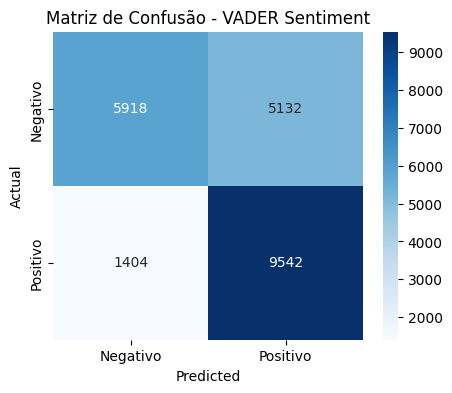

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Inicializar contadores
correct = 0
total = 0

# Lista para armazenar os scores
vader_scores = []

# Loop manual para comparar diretamente com os rótulos 'pos'/'neg'
for i in range(len(df_imdb_test)):
    text = df_imdb_test.loc[i, 'text']
    true_label = df_imdb_test.loc[i, 'label']  # 'pos' ou 'neg'

    polarity = vader_analyzer.polarity_scores(text)['compound']
    vader_scores.append(polarity)

    if polarity > 0 and true_label == "pos":
        correct += 1
    elif polarity < 0 and true_label == "neg":
        correct += 1
    total += 1

# Print estilo original
print(f"correct: {correct}, wrong: {total - correct}, accuracy: {correct / total:.3f}")

# Adicionar os scores à base de dados
df_imdb_test['vader_score'] = vader_scores

# Criar previsão binária com base no compound
df_imdb_test['vader_pred'] = df_imdb_test['vader_score'].apply(lambda x: 1 if x > 0 else 0)

# Avaliação com o teu sistema
y_pred = df_imdb_test['vader_pred']
avaliar_modelo(y_true, y_pred, nome_modelo="VADER Sentiment")

### Afinn approach

100%|██████████| 21996/21996 [02:17<00:00, 159.64it/s]



Resultados para: AFINN
Accuracy: 0.715

Classification Report:
              precision    recall  f1-score   support

    Negativo     0.8019    0.5748    0.6696     11050
    Positivo     0.6662    0.8567    0.7495     10946

    accuracy                         0.7150     21996
   macro avg     0.7340    0.7157    0.7095     21996
weighted avg     0.7344    0.7150    0.7094     21996



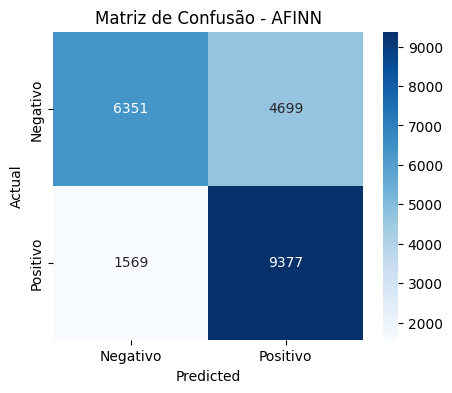

In [ ]:
from afinn import Afinn

# Instanciar o analisador Afinn
afinn = Afinn()

# Função para obter o score do Afinn
def get_afinn_sentiment(text):
    return afinn.score(text)

# Aplicar aos textos
df_imdb_test['afinn_score'] = df_imdb_test['text'].progress_apply(get_afinn_sentiment)

# Converter o score para previsão binária (positivo ou negativo)
df_imdb_test['afinn_pred'] = df_imdb_test['afinn_score'].apply(lambda x: 1 if x > 0 else 0)

# Avaliação
y_pred = df_imdb_test['afinn_pred']
avaliar_modelo(y_true, y_pred, nome_modelo = "Afinn")

### Flair approach

Documentação Flair: https://flairnlp.github.io/docs/tutorial-basics/tagging-sentiment

O Flair foi treinado com IMDB, Amazon, e Yelp *reviews*, que tivesse bons resultados.

100%|██████████| 21996/21996 [2:56:00<00:00,  2.08it/s]



Resultados para: Flair
Accuracy: 0.903

Classification Report:
              precision    recall  f1-score   support

    Negativo     0.8568    0.9678    0.9089     11050
    Positivo     0.9626    0.8367    0.8952     10946

    accuracy                         0.9025     21996
   macro avg     0.9097    0.9022    0.9021     21996
weighted avg     0.9094    0.9025    0.9021     21996



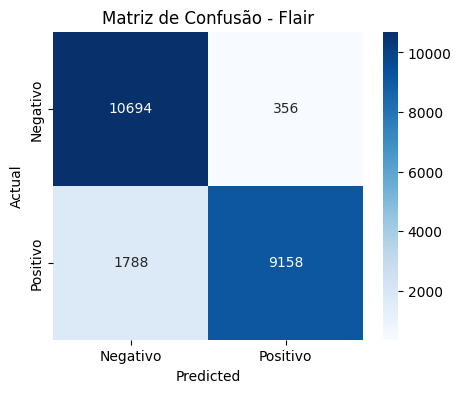

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

# Carregar o modelo pré-treinado
classifier = TextClassifier.load('sentiment')

# Função para aplicar o Flair
def get_flair_sentiment(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    label = sentence.labels[0].value
    return 1 if label == 'POSITIVE' else 0

# Aplicar
df_imdb_test['flair_pred'] = df_imdb_test['text'].progress_apply(get_flair_sentiment)

# Avaliar
y_pred = df_imdb_test['flair_pred']
avaliar_modelo(y_true, y_pred, nome_modelo = "Flair")

### (Opcional) Text2Emotion approach

100%|██████████| 21996/21996 [5:54:34<00:00,  1.03it/s]



Resultados para: Text2Emotion
Accuracy: 0.562

Classification Report:
              precision    recall  f1-score   support

    Negativo     0.5372    0.9217    0.6788     11050
    Positivo     0.7153    0.1985    0.3108     10946

    accuracy                         0.5618     21996
   macro avg     0.6263    0.5601    0.4948     21996
weighted avg     0.6258    0.5618    0.4957     21996



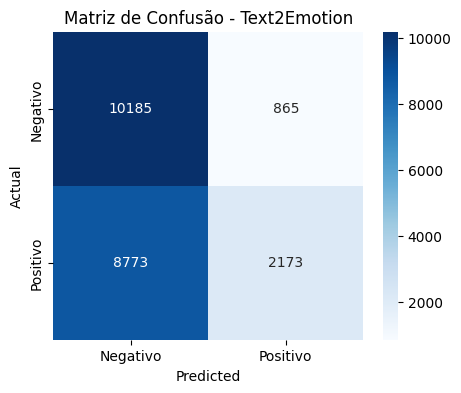

In [ ]:
import text2emotion as te

# Text2Emotion
def get_text2emotion_sentiment(text):
    emotions = te.get_emotion(text)
    score = (emotions['Happy'] + emotions['Surprise']) - (emotions['Sad'] + emotions['Angry'] + emotions['Fear'])
    return score

df_imdb_test['t2e_score'] = df_imdb_test['text'].progress_apply(get_text2emotion_sentiment)
df_imdb_test['t2e_pred'] = df_imdb_test['t2e_score'].apply(lambda x: 1 if x > 0 else 0)2
y_pred = df_imdb_test['t2e_pred']
avaliar_modelo(y_true, y_pred, nome_modelo = "Text2Emotion")

O script, além de ter demorado aproximadamente 6 horas, obteve uma precisão de 0,56, o que é inferior às precisões observadas para o TextBlob e o VaderSentiment. Este resultado pode ser justificado pela documentação do modelo, que recomenda a realização de pré-processamento antes da análise (ver mais em: [Text2Emotion](https://pypi.org/project/text2emotion/)).

##2.3 Preparação de dados e aplicação de um léxico de sentimentos

Após consultar a literatura, decidimos utilizar três léxicos nesta seção: NCR Lexicon, SentiWordNet e Bing Liu Lexicon.

In [ ]:
# Função universal para avaliar os modelos
def avaliar_modelo(y_true, y_pred, nome_modelo):
    print(f"\nResultados para: {nome_modelo}")

    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {round(accuracy, 3)}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4, target_names = ['Negativo', 'Positivo']))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize = (5, 4))
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
                xticklabels = ['Negativo', 'Positivo'], yticklabels = ['Negativo', 'Positivo'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.show()

### NRC Emotion Lexicon


In [ ]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, sentiwordnet as swn
from nltk import pos_tag
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tqdm import tqdm

# Barra para ver o progresso do run time
tqdm.pandas()

# Downloads necessários
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# NRC EmoLex data:
file_path = "en/NCR-lexicon.csv"
emolex_df = pd.read_csv(file_path)
emolex_df.head()

English  Positive  Negative
0        aback         0         0
1       abacus         0         0
2      abandon         0         1
3    abandoned         0         1
4  abandonment         0         1

In [ ]:
# Função para aplicar o léxico NRC ao texto (do Professor).
# Como pré processamento temos Case Folding, e remoção de pontuação.
def nrc_sentiment(text, lex):
    words = re.findall(r'\b\w+\b', text.lower())
    score = sum(lex.get(w, 0) for w in words)
    return 1 if score >= 0 else 0

# Função para aplicar negação.
negation_words = {"not", "no", "never", "n't", "dont", "doesnt", "didnt", "isnt", "wasnt", "cannot"}
def aplicar_negacao(tokens):
    resultado = []
    negar = False
    for palavra in tokens:
        if palavra.lower() in negation_words:
            negar = True
            resultado.append(palavra)
        elif re.match(r"[.!?]", palavra):
            negar = False
            resultado.append(palavra)
        else:
            resultado.append(f"NOT_{palavra}" if negar else palavra)
    return resultado


In [ ]:
# Criar dicionário a partir das colunas Positive e Negative
lexico_nrc = (emolex_df.set_index("English")[["Positive", "Negative"]].eval("Positive - Negative").to_dict())

# Aplicar o NRC lexicon aos dados sem negação
df_imdb_test['nrc_pred'] = df_imdb_test['text'].apply(lambda x: nrc_sentiment(x, lexico_nrc))

# Criação de uma cópia do dataframe, e pré processamento (tokenização)
df_imdb_test_neg = df_imdb_test.copy()
df_imdb_test_neg["tokens"] = df_imdb_test_neg["text"].apply(word_tokenize)
df_imdb_test_neg["tokens_neg"] = df_imdb_test_neg["tokens"].apply(aplicar_negacao)
df_imdb_test_neg["text_neg"] = df_imdb_test_neg["tokens_neg"].apply(lambda x: " ".join(x))
# Aplicar o NRC lexicon aos dados com negação
df_imdb_test_neg["nrc_pred_neg"] = df_imdb_test_neg["text_neg"].apply(lambda x: nrc_sentiment(x, lexico_nrc))

# Converter rótulos para binário (0 = neg, 1 = pos)
df_imdb_test["label_bin"] = df_imdb_test["label"].map({"neg": 0, "pos": 1})
df_imdb_test_neg["label_bin"] = df_imdb_test_neg["label"].map({"neg": 0, "pos": 1})


Resultados para: NRC Lexicon (sem negação)
Accuracy: 0.633

Classification Report:
              precision    recall  f1-score   support

    Negativo     0.7628    0.3915    0.5174     11050
    Positivo     0.5881    0.8771    0.7041     10946

    accuracy                         0.6332     21996
   macro avg     0.6755    0.6343    0.6108     21996
weighted avg     0.6759    0.6332    0.6103     21996



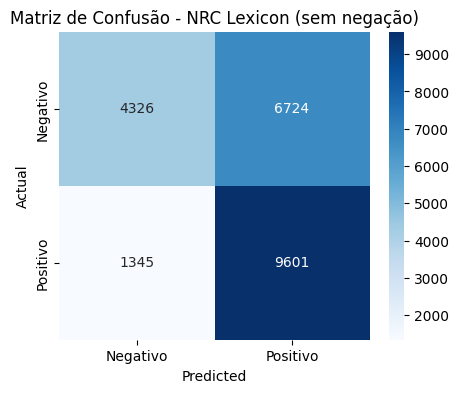

In [ ]:
# Avaliação da matriz de confusão (sem negação)
avaliar_modelo(df_imdb_test["label_bin"], df_imdb_test["nrc_pred"], "NRC Lexicon (sem negação)")


Resultados para: NRC Lexicon (com negação)
Accuracy: 0.648

Classification Report:
              precision    recall  f1-score   support

    Negativo     0.7638    0.4344    0.5538     11050
    Positivo     0.6022    0.8644    0.7099     10946

    accuracy                         0.6484     21996
   macro avg     0.6830    0.6494    0.6319     21996
weighted avg     0.6834    0.6484    0.6315     21996



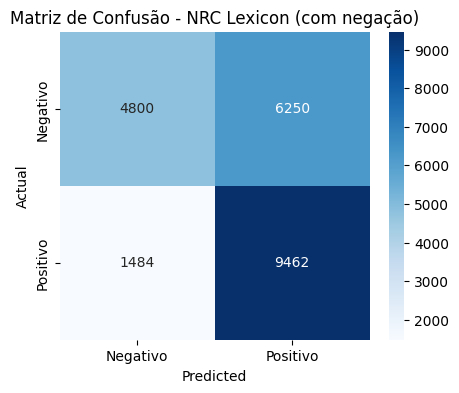

In [ ]:
# Avaliação da matriz de confusão (com negação)
avaliar_modelo(df_imdb_test_neg["label_bin"], df_imdb_test_neg["nrc_pred_neg"], "NRC Lexicon (com negação)")

Conclusão: Aplicar mais steps de pré processamento e também negação, não influenciou significativamente os resultados obtidos para o NRC Lexicon.

### SentimentWordNet Lexicon

In [ ]:
# Função para o pré processamento com POS tagging, que é obrigatório quando usamos o SentiWordNet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Função para calcular sentimento com SentiWordNet
def sentiwordnet_sentiment(text):
    score = 0
    words = word_tokenize(text)
    tagged_words = pos_tag(words)

    for word, tag in tagged_words:
        wn_tag = get_wordnet_pos(tag)
        if not wn_tag:
            continue
        synsets = list(swn.senti_synsets(word, wn_tag))
        if not synsets:
            continue
        synset = synsets[0]
        score += synset.pos_score() - synset.neg_score()

    return 1 if score >= 0 else 0

In [ ]:
# Aplicar SentiWordNet ao conjunto de teste (sem negação)
df_imdb_test['swn_pred'] = df_imdb_test['text'].apply(sentiwordnet_sentiment)

# Criação de uma cópia do dataframe, pré processamento (tokenização), e negação
df_imdb_test_neg = df_imdb_test.copy()
df_imdb_test_neg["tokens"] = df_imdb_test_neg["text"].apply(word_tokenize)
df_imdb_test_neg["tokens_neg"] = df_imdb_test_neg["tokens"].apply(aplicar_negacao)
df_imdb_test_neg["text_neg"] = df_imdb_test_neg["tokens_neg"].apply(lambda x: " ".join(x))
df_imdb_test_neg["swn_pred_neg"] = df_imdb_test_neg["text_neg"].apply(sentiwordnet_sentiment)

# Garantir que os rótulos estão binários
df_imdb_test["label_bin"] = df_imdb_test["label"].map({"neg": 0, "pos": 1})
df_imdb_test_neg["label_bin"] = df_imdb_test_neg["label"].map({"neg": 0, "pos": 1})


Resultados para: SentiWordNet (sem negação)
Accuracy: 0.616

Classification Report:
              precision    recall  f1-score   support

    Negativo     0.7690    0.3371    0.4687     11050
    Positivo     0.5729    0.8978    0.6995     10946

    accuracy                         0.6161     21996
   macro avg     0.6710    0.6174    0.5841     21996
weighted avg     0.6714    0.6161    0.5836     21996



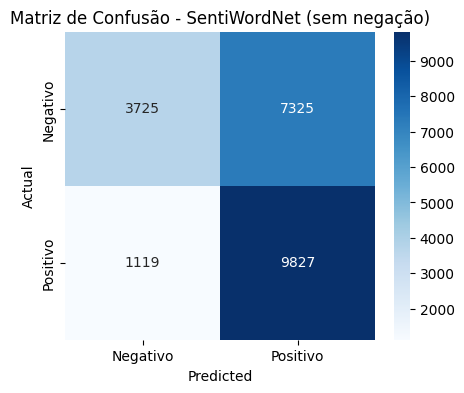

In [ ]:
# Avaliação da matriz de confusão (sem negação)
avaliar_modelo(df_imdb_test["label_bin"], df_imdb_test["swn_pred"], "SentiWordNet (sem negação)")


Resultados para: SentiWordNet (com negação)
Accuracy: 0.632

Classification Report:
              precision    recall  f1-score   support

    Negativo     0.7530    0.3990    0.5216     11050
    Positivo     0.5886    0.8679    0.7014     10946

    accuracy                         0.6323     21996
   macro avg     0.6708    0.6335    0.6115     21996
weighted avg     0.6712    0.6323    0.6111     21996



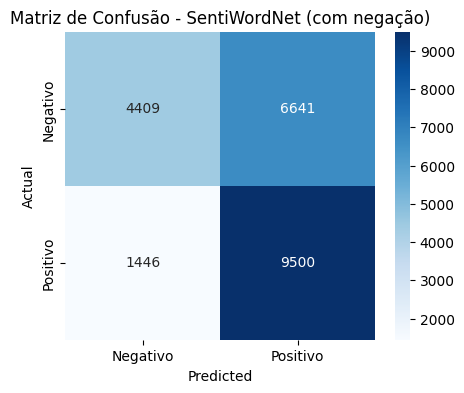

In [ ]:
# Avaliação da matriz de confusão (com negação)
avaliar_modelo(df_imdb_test_neg["label_bin"], df_imdb_test_neg["swn_pred_neg"], "SentiWordNet (com negação)")

**Conclusão**: De forma semelhante ao que foi observado para o NRC Lexicon, a aplicação de mais etapas de pré-processamento, incluindo a negação, não teve uma influência significativa nos resultados.

### Bing Liu Opinion Lexicon

O léxico de Bing Liu é um dicionário de palavras classificadas como positivas ou negativas, amplamente utilizado em tarefas de análise de sentimentos. Cada palavra está associada a uma polaridade (positiva ou negativa), o que o torna adequado para o nosso caso, que envolve uma tarefa de classificação binária.

Este léxico foi originalmente desenvolvido para análise de opiniões em reviews, sendo por isso uma escolha apropriada para aplicar ao nosso conjunto de dados do IMDb.

**Referência**:

Minqing Hu e Bing Liu, “Mining and summarizing customer reviews.”, Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery & Data Mining (KDD-2004), Seattle, Washington, EUA, 22-25 de agosto de 2004.


In [ ]:
import nltk, re
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [ ]:
# Conjuntos de palavras positivas e negativas
pos_words = set(opinion_lexicon.positive())
neg_words = set(opinion_lexicon.negative())

# Função para calcular o sentimento
def bingliu_sentiment(text):
    words = re.findall(r'\b\w+\b', text.lower())
    score = 0
    for word in words:
        if word in pos_words:
            score += 1
        elif word in neg_words:
            score -= 1
    return 1 if score >= 0 else 0

In [ ]:
# Aplicar Bing Liu sentiment ao conjunto de teste (sem negação)
df_imdb_test['bingliu_pred'] = df_imdb_test['text'].apply(bingliu_sentiment)

# Criação de uma cópia do dataframe, pré processamento (tokenização), e negação
df_imdb_test_neg = df_imdb_test.copy()
df_imdb_test_neg["tokens"] = df_imdb_test_neg["text"].apply(word_tokenize)
df_imdb_test_neg["tokens_neg"] = df_imdb_test_neg["tokens"].apply(aplicar_negacao)
df_imdb_test_neg["text_neg"] = df_imdb_test_neg["tokens_neg"].apply(lambda x: " ".join(x))
df_imdb_test_neg["bingliu_pred_neg"] = df_imdb_test_neg["text_neg"].apply(bingliu_sentiment)

# Garantir que os rótulos estão binários
df_imdb_test["label_bin"] = df_imdb_test["label"].map({"neg": 0, "pos": 1})
df_imdb_test_neg["label_bin"] = df_imdb_test_neg["label"].map({"neg": 0, "pos": 1})


Resultados para: Bing Liu Lexicon (sem negação)
Accuracy: 0.729

Classification Report:
              precision    recall  f1-score   support

    Negativo     0.7816    0.6380    0.7025     11050
    Positivo     0.6917    0.8200    0.7504     10946

    accuracy                         0.7286     21996
   macro avg     0.7367    0.7290    0.7265     21996
weighted avg     0.7369    0.7286    0.7264     21996



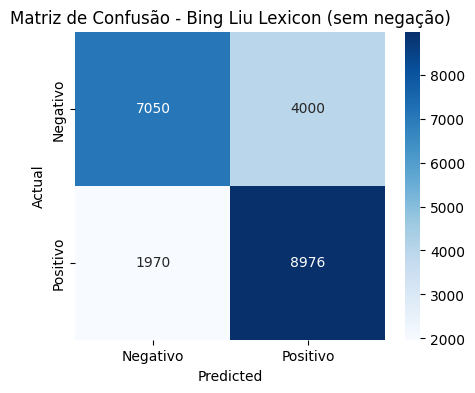

In [ ]:
# Avaliação da matriz de confusão (sem negação)
avaliar_modelo(df_imdb_test["label_bin"], df_imdb_test["bingliu_pred"], "Bing Liu Lexicon (sem negação)")


Resultados para: Bing Liu Lexicon (com negação)
Accuracy: 0.725

Classification Report:
              precision    recall  f1-score   support

    Negativo     0.7761    0.6363    0.6993     11050
    Positivo     0.6893    0.8147    0.7468     10946

    accuracy                         0.7251     21996
   macro avg     0.7327    0.7255    0.7230     21996
weighted avg     0.7329    0.7251    0.7229     21996



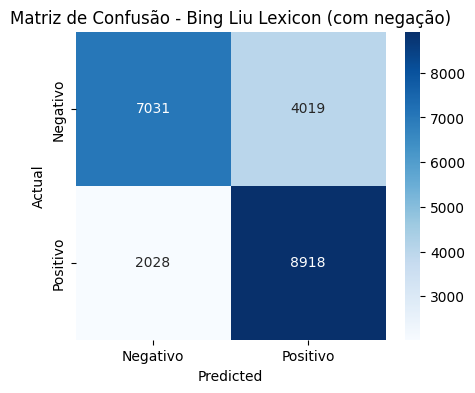

In [ ]:
# Avaliação da matriz de confusão (com negação)
avaliar_modelo(df_imdb_test_neg["label_bin"], df_imdb_test_neg["bingliu_pred_neg"], "Bing Liu Lexicon (com negação)")

**Conclusão**: De forma semelhante aos outros dois léxicos, a aplicação da negação não resultou em melhorias significativas, tendo até sido observado um decréscimo não significativo na *accuracy*.
